Assignment: MNIST Digit Classification Using Dense Neural Networks

Objective:
Train a feedforward neural network (Dense/MLP) to classify handwritten digits from the MNIST dataset and explore the effects of network architecture and activation functions on performance.

https://www.kaggle.com/datasets/hichamachahboun/mnist-handwritten-digits

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


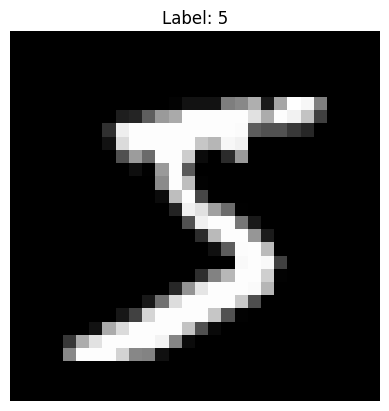

Processed train shape: (60000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8636 - loss: 0.4728 - val_accuracy: 0.9617 - val_loss: 0.1316
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9604 - loss: 0.1330 - val_accuracy: 0.9732 - val_loss: 0.0982
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9759 - loss: 0.0852 - val_accuracy: 0.9770 - val_loss: 0.0793
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9804 - loss: 0.0639 - val_accuracy: 0.9767 - val_loss: 0.0855
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0486 - val_accuracy: 0.9812 - val_loss: 0.0711
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0816
Test Accuracy: 0.977400004863739
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted label: 7
Actual label: 7


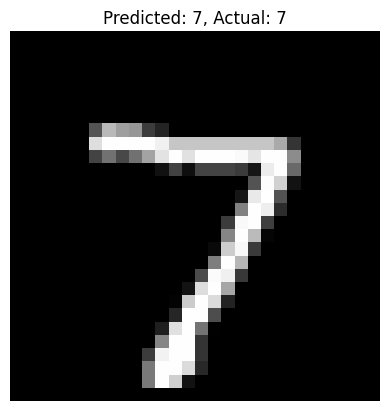

In [5]:
# ===============================
# 1. Import required libraries
# ===============================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# ===============================
# 2. Load the dataset
# ===============================
# Load data
X_train = np.load("/content/drive/MyDrive/Makeen 2025 - Data Science Stream/Deep Learning/Shared DL Slides/Shared DL code/train_images.npy")
y_train = np.load("/content/drive/MyDrive/Makeen 2025 - Data Science Stream/Deep Learning/Shared DL Slides/Shared DL code/train_labels.npy")

X_test = np.load("/content/drive/MyDrive/Makeen 2025 - Data Science Stream/Deep Learning/Shared DL Slides/Shared DL code/test_images.npy")
y_test = np.load("/content/drive/MyDrive/Makeen 2025 - Data Science Stream/Deep Learning/Shared DL Slides/Shared DL code/test_labels.npy")

# Check shapes
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# ===============================
# 3. Visualize one training image
# ===============================
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

# ===============================
# 4. Preprocess the data
# ===============================

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add channel dimension if images are grayscale
# Example: (60000, 28, 28) → (60000, 28, 28, 1)
if len(X_train.shape) == 3:
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

print("Processed train shape:", X_train.shape)

# ===============================
# 5. Build the model
# ===============================
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Change 10 if number of classes is different
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show model structure
model.summary()

# ===============================
# 6. Train the model
# ===============================
model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.1
)

# ===============================
# 7. Evaluate the model
# ===============================
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# ===============================
# 8. Make predictions
# ===============================
predictions = model.predict(X_test)

print("Predicted label:", np.argmax(predictions[0]))
print("Actual label:", y_test[0])

# Display the test image
plt.imshow(X_test[0].squeeze(), cmap="gray")
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}")
plt.axis("off")
plt.show()
